In [29]:
import numpy as np
from scipy.linalg import inv, norm
import matplotlib as mpl
import matplotlib.pyplot as plt

from src.constants import (A_INV_12, ZETA, EPS_VAL, TRUE_SYSTEM)


This Notebook plots the ellipsoid and its offset in the paper (Figure 2).

The offset for the ellipsoid is the special case of what we have presented as
$\mathcal{S}$ in Lemma 5 since essentially we are working in the Euclidean space. 

In [30]:
def create_ellipsoid_and_offset(Ainv_12: np.ndarray, zeta: np.ndarray, eps_val: float, T: int =5000)->tuple:
    """
    Generates the coordinates of an ellipsoid and its offset version in a 2D space.

    Parameters:
        Ainv_12 (np.ndarray): The inverse of the ellipsoid's shape matrix.
        zeta (np.ndarray): The center of the ellipsoid.
        eps_val (float): The offset magnitude.
        T (int): The number of points used to create the ellipsoid. Default is 5000.

    Returns:
        Eb (np.ndarray): Coordinates of the ellipsoid.
        Eoff (np.ndarray): Coordinates of the offset ellipsoid.
    """


    t = np.linspace(0, 2 * np.pi, T)
    tx = np.cos(t).reshape(1, -1)
    ty = np.sin(t).reshape(1, -1)
    unit_circle = np.vstack((tx, ty))


    # place holders for the ellipsoid and the offset for ellipsoid 
    Eb = np.zeros((2 , T))
    Eoff = np.zeros((2, T))


    for i in range(T):

        z = unit_circle[:, [i]]
        
        # This is our ellipse
        Eb[:, [i]] = (Ainv_12 @ z) 


        # scale factor 
        scale_factor = eps_val * inv(Ainv_12)/(norm((inv(Ainv_12) @ z)))
        # The offset for the ellipse
        Eoff[:, [i]] = (Ainv_12 @ z) + scale_factor @ z 


    # Here we shift the data
    Eb +=  zeta
    Eoff +=  zeta
    # epsilon neighborhood for Z_star
    eps_neigh = eps_val*unit_circle + TRUE_SYSTEM
    return Eb, Eoff, eps_neigh

In [31]:

  
Eb, Eoff, eps_neigh = create_ellipsoid_and_offset(A_INV_12, ZETA, EPS_VAL)

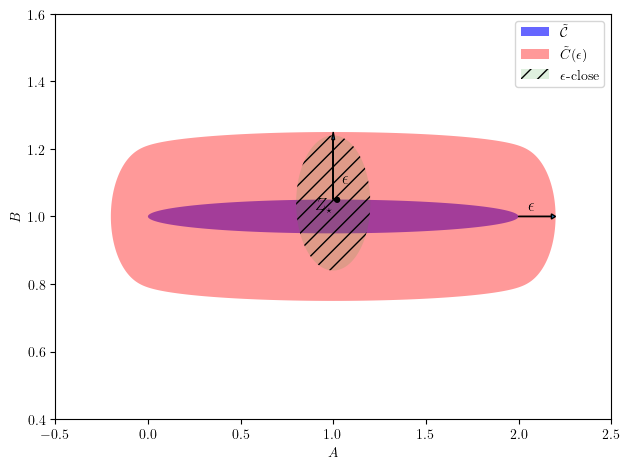

In [32]:

# Set the font settings
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rc('text', usetex=True)
mpl.rc('font', family='serif')


fig = plt.figure()
ax = fig.subplots(1,1)

# Plot the ellipsoid and offset ellipsoid
ax.fill(Eb[0, :], Eb[1, :], alpha=0.6, facecolor='blue', label=r" $\tilde{\mathcal{C}}$")
ax.fill(Eoff[0, :], Eoff[1, :], alpha=0.4, facecolor='red', label=r" $\tilde{{C}}(\epsilon)$")


# Plot the true system
ax.fill(eps_neigh[0, :], eps_neigh[1, :], alpha=0.15,  hatch= '//', label=r" $\epsilon$-close")
ax.text(TRUE_SYSTEM[0], TRUE_SYSTEM[1], s=r'${\bullet}$', fontsize='large')
ax.text(TRUE_SYSTEM[0]-0.1, TRUE_SYSTEM[1]-0.02, s=r'$Z_{\star}$', fontsize='large')



# Add arrows and annotations
ax.arrow(x=1, y=1+0.05, dx=0, dy=0.2, length_includes_head=True, head_width=0.015)
ax.text(x=1.05, y=1.1, s=r'$\epsilon$', fontsize='large')

ax.arrow(x=2, y=1, dx=0.2, dy=0, length_includes_head=True, head_width=0.015)
ax.text(x=2.05, y=1.02, s=r'$\epsilon$', fontsize='large')

# Set axis labels and limits
ax.set(xlabel=r"$A$", ylabel=r"$B$", ylim=(0.4, 1.6), xlim=(-0.5, 2.5))
ax.legend()

plt.tight_layout()
fig.savefig("offset.pdf", transparent=True)
plt.show()
